In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import randint
import matplotlib.colors as colors
from sklearn.naive_bayes import GaussianNB
from scipy.stats import loguniform
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import roc_curve,roc_auc_score



In [15]:
Financial_new=pd.read_csv('Financial_clean_encoded.csv')
Financial_new

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,1,0,0,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,0,1
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,1,0,0,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,0,1


In [16]:
Financial_new.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

<Axes: xlabel='isFraud', ylabel='count'>

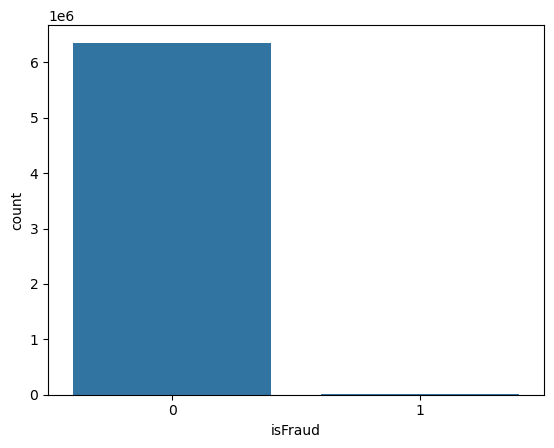

In [17]:
sns.countplot(x='isFraud', data=Financial_new)

## 1. KNN Model

Confusion Matrix:


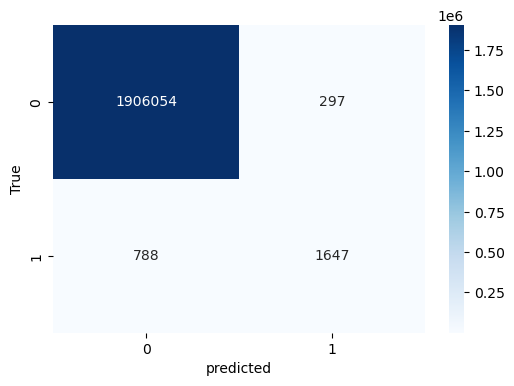

In [18]:


#  'X' (features) and 'y' (target variable)
X = Financial_new.drop('isFraud', axis=1)  
y = Financial_new['isFraud']  

#  Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#  Train the model using KNN
knn = KNeighborsClassifier()  
knn.fit(X_train, y_train)

#  Make predictions on the test data
y_pred = knn.predict(X_test)  # Using the test set (not training data)



#  Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('True')
# Display the confusion matrix
print("Confusion Matrix:")
plt.show()


## 2.Gaussian Naive Bayes Model

Confusion Matrix:
[[1906054     297]
 [    788    1647]]


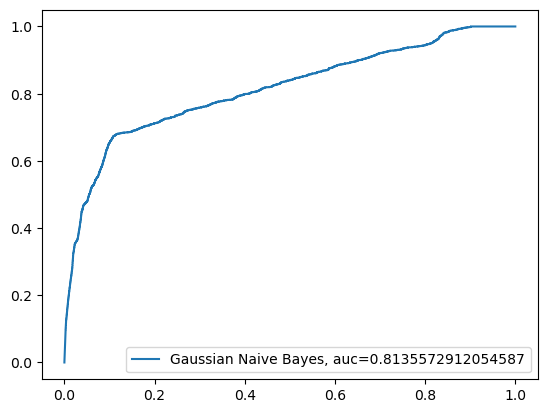

In [19]:


#  Train the model (Gaussian Naive Bayes)
model_sk = GaussianNB()
model_sk.fit(X_train, y_train)
# Create confusion matrix
matrix = confusion_matrix(y_test, y_pred)

#  confusion matrix
print("Confusion Matrix:")
print(matrix)

#  Predict probabilities for the test set (use predict_proba for ROC curve)
y_probs = model_sk.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (fraud)

#  Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)

#  Calculate AUC (Area Under the Curve)
auc=roc_auc_score(y_test,y_probs)


#  Plot the ROC curve
plt.plot(fpr,tpr,label="Gaussian Naive Bayes, auc="+str(auc))
plt.legend(loc=4)
plt.show() 

### AUC score for the case is 0.81. AUC score 1 represents a perfect classifier,

In [20]:
from sklearn.metrics import accuracy_score


y_pred = model_sk.predict(X_test)  # Model predictions on the test set

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.99


## 3.Logistic Regression Model

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


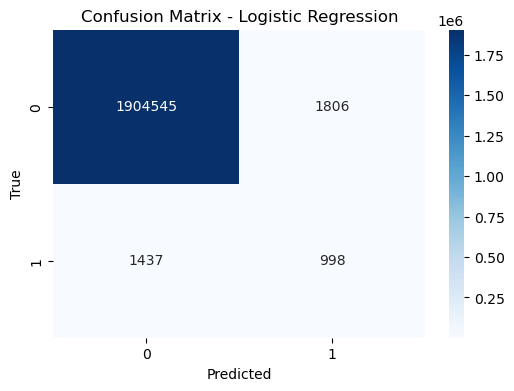

In [21]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


###  Evaluating  the model using classification_report for accuracy, precision, and recall.

In [22]:
target_names = ['Not Fraud', 'Fraud']
print(classification_report(y_test, y_pred, target_names=target_names))

#Finding Accuracy:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1906351
       Fraud       0.36      0.41      0.38      2435

    accuracy                           1.00   1908786
   macro avg       0.68      0.70      0.69   1908786
weighted avg       1.00      1.00      1.00   1908786

Accuracy: 1.00


###  The above model has an accuracy of nearly 100%, but this is mainly because most transactions are not fraud.

### Precision: Precision tells us how often the model is correct when it predicts fraud. In this case, when the model flags a transaction as fraud, it's actually fraud 36% of the time.
### Recall: Recall measures how well the model identifies actual fraud cases. Here, if a transaction is truly fraudulent, the model correctly detects it 41% of the time.

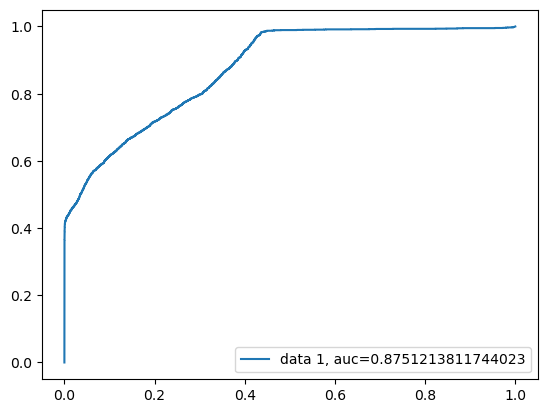

In [23]:
#ROC Curve
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### AUC score for the case is 0.88. AUC score 1 represents a perfect classifier.

## Hyperparameter Tuning: RandomSearchCV

In [24]:


param_dist = {
    'n_neighbors': randint(3, 50),  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan', 'minkowski'],  
    'p': [1, 2]  
}


In [25]:
# Using  10% of data
df_sample = Financial_new.sample(frac=0.1, random_state=42)  

In [26]:
knn= KNeighborsClassifier()
random_search = RandomizedSearchCV(
    knn, param_distributions=param_dist, 
    n_iter=10,  # Reduce number of iterations 
    scoring='f1', cv=3,  # Reduce cross-validation folds from 5 to 3
    random_state=42, n_jobs=-1
)
#random_search.fit(X_train,y_train)
#print("Best Hyperparameters:",random_search.best_params_)